In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
amypro = pd.read_csv('amypro22.csv')
amypro_residues = pd.read_csv('amypro22_residues.csv')
amypro_full = pd.read_pickle('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/full_amypro_predictions.pkl')

In [14]:
tau = amypro_full[amypro_full['protein_name'] == 'Serum Amyloid A'][['entry_id', 'pdb_id', 'pubmed_ids', 'protein_name', 'prion_domain',
       'class_name', 'uniprot_id', 'sequence', 'mutations', 'uniprot_end',
       'uniprot_start', 'species', 'description',
       'regions.region_1.region_indices', 'regions.region_1.region_sequence',
       'regions.region_2.region_indices', 'regions.region_2.region_sequence',
       'regions.region_3.region_indices', 'regions.region_3.region_sequence',
       'regions.region_4.region_indices', 'regions.region_4.region_sequence',
       'regions.region_5.region_indices', 'regions.region_5.region_sequence']]
tau['len'] = len(tau['sequence'][83])

In [15]:
def expand_row(row, seg_len):
    seq = row['sequence']
    #mask = row['res_value_bool']
    mask = None
    
    name = row['protein_name']
    length = row['len']
    results = []

    if len(seq) > seg_len:
        for i in range(0, len(seq), seg_len):
            seg_seq = seq[i:i+seg_len]
            #seg_mask = mask[i:i+seg_len]
            seg_mask = None
            
            # Only add if the segment is not empty
            if seg_seq:
                results.append([seg_seq, seg_mask, name, length, len(seg_seq)])
    else:
        results.append([seq, mask, name, length, len(seq)])
        
    return results

expanded_rows = []
for idx, row in tau.iterrows():
    expanded_rows.extend(expand_row(row, 50))

expanded_df = pd.DataFrame(expanded_rows, columns=['sequence', 'res_value_bool', 'name', 'length', 'frag_len'])

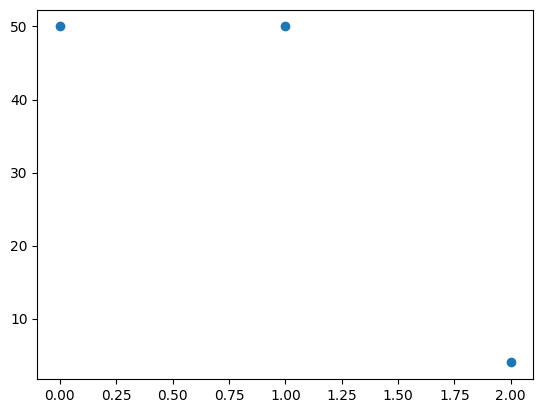

In [16]:
plt.scatter(range(len(expanded_df['frag_len'])), expanded_df['frag_len'])

In [17]:
sum(tau['len']), sum(expanded_df['frag_len'])

(104, 104)

In [18]:
expanded_df

,sequence,res_value_bool,name,length,frag_len
0,RSFFSFLGEAFDGARDMWRAYSDMREANYIGSDKYFHARGNYDAAK...,None,Serum Amyloid A,104,50
1,GVWAAEAISDARENIQRFFGHGAEDSLADQAANEWGRSGKDPNHFR...,None,Serum Amyloid A,104,50
2,PEKY,None,Serum Amyloid A,104,4


In [19]:
expanded_df.to_csv('serum_frag50.csv')